# Lista de exercícios sobre TensorFlow - Funcionamento Básico

**Disciplina**: Introdução a redes neurais profundas 2018/1  
**Professor**: Jorge Leonid Aching Samatelo

**Aluno**: Humberto da Silva Neto

## Tabela de conteúdos
1. [Indicações](#indicacoes)
1. [Exercícios sobre Sessões](#exerSessoes)
1. [Exercícios sobre Tensores](#exerTensores)

## Indicações <a name="indicacoes"></a>

### Considerações
* Cada aluno enviará por e-mail a solução dos exercícios propostos, tais soluções devem ser inseridas neste mesmo arquivo. 
* Para saber cómo trabalhar com arquivos `*.ipynb` é necessario ler os slides NOME ARQUIVO.

### Prazo
* Envio das soluções: Domingo 13/05/2018 - (11:59 pm) 

### Procedimento para o envio das soluções
* O arquivo `*.ipynb` com as soluções dos exercícios deve ser enviado ao email <jlasam001@gmail.com> com o assunto: `LISTA_EXERCICIO_TFBASIC_2018_1`. 
* O nome do arquivo `*.ipynb` deve iniciar com o rotulo `DL_LISTA_TFBASIC` seguido pelas iniciais do nome do aluno que soluciono os exercícios (por exemplo, o aluno Pedro Farias enviara o arquivo `DL_LISTA_TFBASIC_PF.ipynb`).

### Dicas execução
* Carregue todos os pacotes que serão necessários no início do arquivo.
* Entre um exercício e outro, utilize um grafo diferente ou então reínicie o grafo padrão.
* Para executar comandos da shell dentro do notebook, utilize o prefixo `!` antes do comando de shell. (e.g. para listar os arquivos da pasta atual faça `! ls` para UNIX ou `! dir` para Windows.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Exercícios sobre sessões <a name="exerSessoes"></a>

### Exe. 1

Faça um grafo que tenha duas constantes (`tf.constants`) e uma operação de multiplicação. Imprima as imprima as operações criadas (fora de uma sessão).  
**Dica**: Você não obterá o valor numerico das operações, mas sim a definição dos tensores.

In [2]:
a = tf.constant([2])
b = tf.constant([3])

mul = tf.multiply(a,b)

print(a)
print(b)
print(mul)

Tensor("Const:0", shape=(1,), dtype=int32)
Tensor("Const_1:0", shape=(1,), dtype=int32)
Tensor("Mul:0", shape=(1,), dtype=int32)


### Exe. 2

Avalie o resultado da multiplicação com uma sessão interativa (`tf.InteractiveSession`).  
Note que é necessário fechar a sessão com o método `close` da sessão para que ela libere a memória usada.

In [3]:
sess = tf.InteractiveSession()
print(sess.run(mul))
sess.close()

[6]


### Exe. 3

Avalie agora o resultado da multiplicação com uma sessão em um bloco `with tf.Session() as sess:`.  
Note que nesse método a sessão é fechada automaticamente para você.

In [4]:
with tf.Session() as sess:
  print(sess.run(mul))

[6]


### Exe. 4

Visualize as operações criadas dentro do grafo usando o tensorboard. Para isso utilize


In [0]:
# tf.summary.FileWriter('logs', tf.get_default_graph()).close()

In [0]:
#inserir tua solução aqui

## Exercícios sobre tensores <a name="exerTensores"></a>

### Exe. 5

Crie duas matrizes quadradas `A` e `B`, de mesma ordem, utilizando `np.array`. Crie, a partir delas, constantes em TensorFlow e realize o produto matricial `C = A*B`. Verifique as dimensões do resultado com `tf.shape`. 

Calcule ainda o determinantes delas e verifique que `det(C) = det(A)det(B)`

In [7]:
A = tf.constant(np.array([[1.,2],[3,4]]))

B = tf.constant(np.array([[5.,6],[7,8]]))

# C = A*B
C = tf.matmul(A,B)

def det(X):
  return tf.matrix_determinant(X)

with tf.Session() as sess:
  print('Matric C:\n',sess.run(C))
  print('C.shape: ', C.shape)
  print('')
  print('det(A): ', sess.run(det(A)))
  print('det(B): ',sess.run(det(B)))
  print('det(C): ',sess.run(det(C)))

Matric C:
 [[19. 22.]
 [43. 50.]]
C.shape:  (2, 2)

det(A):  -2.0000000000000004
det(B):  -1.999999999999999
det(C):  4.000000000000017


### Exe. 6

Crie tensores com valores aleatórios com as distribuições:

1) Uniforme, com valores entre -1 e 1;

2) Normal, com média 0 e desvio padrão 1;

Ambos com `shape = [50,1]` e plote os histogramas de seus valores. Utilize 10 bins em ambos os casos.

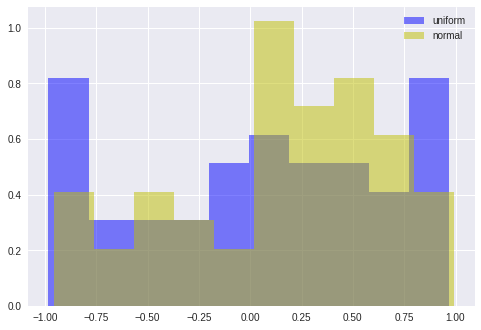

In [8]:
#The uniform variable is a 1-dimensional tensor, the elements 100, containing
#values ranging from 0 to 1, distributed with the same probability:
shape = [50,1]

uniform = tf.random_uniform(shape,minval=-1,maxval=1) 
normal = tf.random_normal(shape, mean=0, stddev=1)

with tf.Session() as sess: 
    uniform_hist = sess.run(uniform)
    normal_hist = sess.run(uniform)
    
    plt.hist(uniform_hist,normed=True, bins=10, alpha=.5, label='uniform', color='b') 
    plt.hist(normal_hist,normed=True, bins=10, alpha=.5, label='normal', color='y')
    plt.legend()
    plt.show()

### Exe. 7

Faça um grafo que calcule os pontos de uma senóide para ser plotada no intervalo `[0,2*pi]`. A equação da senóide é da forma `y = A*sin(w*t)`. Crie nós de entrada `A` e `w` para que os parâmetros sejam recebidos em tempo de execução. 

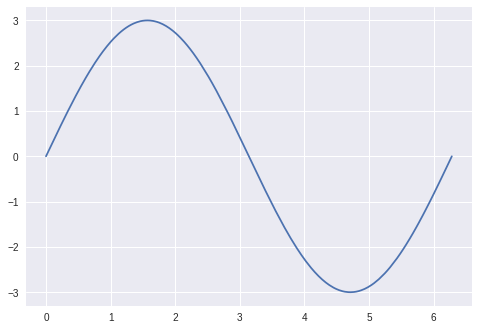

In [9]:
from math import pi

wt = np.linspace(0.0,1.0,1000000)*2*pi

A = tf.placeholder(tf.float32)
w = tf.placeholder(tf.float32)
y = A*tf.sin(w)


with tf.Session() as sess:
  output = sess.run(y, feed_dict={A:3., w:wt})

plt.plot(wt, output)

### Exe. 8

O método de Montecarlo é um método numérico probabilístico muito utilizado em computação. Uma das aplicações é calcular aproximadamente o valor de $\pi$. Para fazer isto, a sequência de passos deve ser:

1) Gere um ponto aleatório $(x,y)$ dentro do quadrado $[-1,1]\times[-1,1]$, onde cada coordenada tem distribuição uniforme.

2) Verifique se o ponto está, ou não, dentro do círculo de raio $1$ e centro na origem.

3) Repita os passos 1 e 2 por $n$ iterações, guardando o número de pontos dentro do círculo.

4) Aproxime $\pi$ por $4$ vezes a razão entre o número de pontos que são gerados dentro e o total de pontos gerados. Isto é válido pois o número de pontos dentro do círculo é proporcional à razão das áreas:
$$\frac{A_{circ}}{A_{quad}} = \frac{\pi R^2}{4 R^2} = \frac{\pi}{4} $$

Implemente o método de Montecarlo para esta finalidade em TensorFlow.

In [14]:
point = tf.random_uniform([1,2], minval=-1, maxval=1)
pi = tf.Variable(0.)
n = 1000
hits = 0

dist = tf.sqrt(tf.add(point[0][0]**2, point[0][1]**2))
init = tf.global_variables_initializer()

#Session
with tf.Session() as sess:
  sess.run(init)
  
  for _ in range(n):
    output = sess.run(dist)    
    if output<=1:
      hits += 1
    
  sess.run(tf.assign(pi, 4*hits/n))
  print('pi = ', sess.run(pi))

pi =  3.16


### Exe. 9

TensorFlow também possui controle de fluxo por meio de condicionais e loops. 

Implemente um grafo que receba dois valors numéricos e um booleano. Dependendo do valor do booleano, o grafo deve retornar o produto (se `True`) ou a soma (se `False`) dos valores numéricos.

In [11]:
x = tf.constant([5])
y = tf.constant([7])
b = tf.placeholder(tf.bool)

equation = tf.where(b, tf.multiply(x, y), tf.add(x, y))

with tf.Session() as sess:
  print(sess.run(equation, feed_dict={b:True}))
  print(sess.run(equation, feed_dict={b:False}))

[35]
[12]


### Exe. 10

A sequência de Fibonacci é uma sequência de grande importância na Teoria dos Números. Ela é recursiva, onde o n-ésimo termo é a soma dos dois anteriores.
$$ a_n = a_{n-1} + a_{n-2} $$
Utilizando loops em TensorFlow, faça um grafo que liste os `n` primeiros termos da sequência de Fibonacci.

In [12]:
n= tf.placeholder(tf.int32)

def cond(i, a, b):
    return i < n

def body(i, a, b):
    return i + 1, b, a + b

i, a, b = tf.while_loop(cond, body, (2, 1, 1))

output = []

with tf.Session() as sess:
  for i in range(1,15):
    run = sess.run(b, feed_dict={n:i})
    output.append(run)
    
print(output)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


### Exe. 11

Equações diferenciais modelam fenômenos em todas as áreas da engenharia. Uma aplicação fundamental é na análise transitória de circuitos elétricos RL, RC e RLC. 

Um circuito RLC pode ser modelado como uma equação diferencial ordinária (EDO) de segunda ordem. Para um circuito RLC série, em termos da tensão no capacitor:
$$
\frac{d^2v_C(t)}{dt^2} + \frac{R}{L}\frac{dv_C(t)}{dt} + \frac{v_C(t)}{LC} = \frac{E}{LC}
$$
onde:

R = resistência (Ohms);

L = indutância (Henrys);

C = capacitância (Farads);

E = fonte de tensão (Volts).

Implemente um grafo que resolva esta EDO para condições iniciais quaisquer dadas.

**Dica:** A função nativa `tf.contrib.integrate.odeint()` resolve apenas EDO's (ou sistemas de EDO's) de primeira ordem. Entretanto, toda EDO de ordem superior pode ser reduzida a sistemas de primeira ordem.

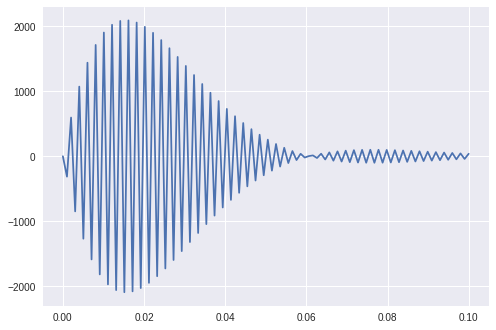

In [13]:
resistance = 1e-1   #ohm
inductance = 1e-3   #Henry
capacitance = 100e-6  #Farad
E = 2.
  
def lorenz_equation(state,t):
  x,v = tf.unstack(state)
  dx = (-resistance/inductance)*x + (-1/(inductance*capacitance))*v +(E/(inductance*capacitance))
  dv = x
  return tf.stack([dx, dv])

init_state = tf.constant([0, 0], dtype = tf.float64)
t = np.linspace(0, 0.1, num=100)

tensor_state, tensor_info = tf.contrib.integrate.odeint(lorenz_equation, 
                                                               init_state, 
                                                               t, 
                                                               full_output=True)

with tf.Session() as sess:
  state, info = sess.run([tensor_state, tensor_info])
  x, v = state.T
  plt.plot(t,x)